# Bird Classification
Deep Learning Model


In [1]:
# Importing Library
import pathlib #To determine the path of Dataset
import PIL #Image Processing tool
import os
import numpy as np
import pandas as pd
import glob

# Tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental.preprocessing import Rescaling # Resacling
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Input
from tensorflow.keras.layers import Dropout,BatchNormalization 

# Visualizing 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Reading dataset from google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
## Path
PATH = {
    "BIRD_CLASSIFICATION_TRAIN" : '/content/gdrive/My Drive/Bird_Classification/Train/Train',
    "BIRD_CLASSIFICATION_TEST" : '/content/gdrive/My Drive/Bird_Classification/Test/Test'
}

In [3]:
# Loading Image
data_dir_train = pathlib.Path(PATH["BIRD_CLASSIFICATION_TRAIN"])
data_dir_test = pathlib.Path(PATH["BIRD_CLASSIFICATION_TEST"])

In [4]:
# Image count
img_count_train = len(list(data_dir_train.glob("*/*.jpg")))
img_count_test = len(list(data_dir_test.glob("*/*.jpg")))

print("Count of Image in Train dataset is : {0}".format(img_count_train))
print("Count of Image in Test dataset is : {0}".format(img_count_test))

Count of Image in Train dataset is : 5523
Count of Image in Test dataset is : 185


In [5]:
# Creating Dataset
# Defining Parameter
batch_size = 32
img_hight = 180
img_width = 180 

In [6]:
# Creating Training dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_hight,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'training',
    label_mode = 'categorical'
)

Found 29241 files belonging to 37 classes.
Using 23393 files for training.


In [7]:
# Creating Validation dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    batch_size = batch_size,
    image_size = (img_hight,img_width),
    seed = 123,
    validation_split = 0.2,
    subset = 'validation',
    label_mode = 'categorical'
)

Found 29241 files belonging to 37 classes.
Using 5848 files for validation.


In [8]:
# Creating class name
class_name = train_ds.class_names
print(class_name)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'AVADAVAT', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT']


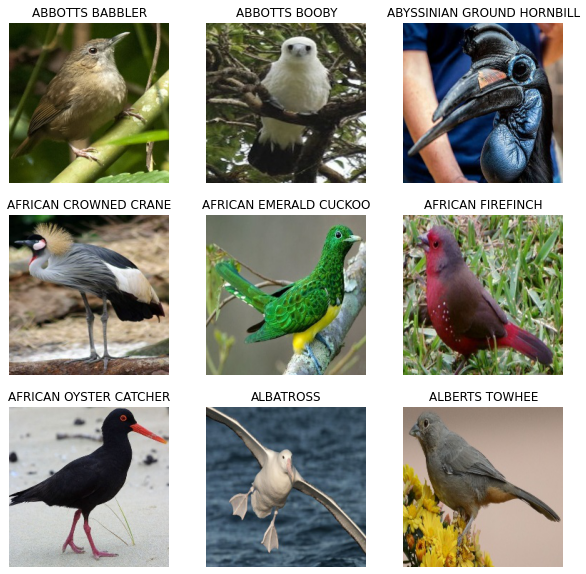

In [9]:
# Visualizing Image
# Plotting Graph
plt.figure(figsize=(10,10))

for i,name in enumerate(class_name[:9]):
  path = str(name)+"/"
  img_path = list(data_dir_train.glob(path+"*.jpg"))[0]
  img = Image.open(img_path)
  # Sub plot
  plt.subplot(3,3,i+1, xticks=[], yticks=[])
  plt.imshow(img)
  plt.axis('off')
  plt.title(name)
plt.show()

In [10]:
# Autotuning
AUTOTUNE = tf.data.experimental.AUTOTUNE
# Cleaing cache after each epochs
# Prefetch overlap data processing and model execution while training
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [12]:
# for image, _ in train_ds.take(1):
#   plt.figure(figsize=(10, 10))
#   first_image = image[0]
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
#     plt.imshow(augmented_image[0] / 255)
#     plt.axis('off')

## Creating Model

In [13]:
# Creating Instance for model-1
model_1 = Sequential()

# Adding rescaling
model_1.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_1.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Pooling
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_1.add(Flatten())
# Adding Dense
model_1.add(Dense(32))
# Adding Activation
model_1.add(Activation('relu'))
# Adding Dense
model_1.add(Dense(len(class_name)))
# Adding Activation
model_1.add(Activation('softmax'))

## Compling Model

In [14]:
# Complie model
model_1.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [15]:
# Visulaizing Summary of model
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 87, 87, 32)        0         
                                                      

## Training Model

In [ ]:
# Training model
epochs = 20

# history
history = model_1.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/20


In [ ]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

In [ ]:
# Creating DataFrame
# Path of Image
path_list_1 = [x for x in glob.glob(os.path.join(data_dir_train, "*/*.jpg"))]

# Lesion List
lesion_list_new_1 = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, "*/*.jpg"))]

# Creating Dictionary
dataframe_dict_1 = dict(zip(path_list_1, lesion_list_new_1))

# Creating Dataframe
orignal_df = pd.DataFrame(data= list(dataframe_dict_1.items()), columns= ["Path", "Label"] )

# Checking head()
orignal_df.groupby("Label").count()

In [ ]:
# Creating model

# Creating Instance for model-2
model_2 = Sequential()

# Adding rescaling
model_2.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3
# Adding Data Augmentance
model_2.add(data_augmentation)
# Adding Convolution layer - 1 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_2.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Pooling
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_2.add(Flatten())
# Adding Dense
model_2.add(Dense(32))
# Adding Activation
model_2.add(Activation('relu'))
# Adding Dropout
model_2.add(Dropout(0.25))
# Adding Dense
model_2.add(Dense(len(class_name)))
# Adding Activation
model_2.add(Activation('softmax'))


# Complie model
model_2.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# model summary
model_2.summary()

In [ ]:
# Training model
epochs = 20

# history
history = model_2.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

In [ ]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

### Adding More image to each class

In [ ]:
!pip install Augmentor

In [ ]:
import Augmentor

In [ ]:
 # Path to training data
path_to_training_dataset = PATH["BIRD_CLASSIFICATION_TRAIN"]+"/"

# Defining operation for each class name
for each_class in class_name:
  p = Augmentor.Pipeline(path_to_training_dataset + each_class)
  # Applying Operation
  p.rotate(probability = 0.7, max_left_rotation = 10, max_right_rotation = 10)
  # Adding 500 Sample
  p.sample(500)

In [ ]:
# Count of train image
img_count_train = len(list(data_dir_train.glob("*/output/*.jpg")))
print(img_count_train)

In [ ]:
# New Path
# Path
path_list_2 = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
# lesion list new
lesion_list_new_2 = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, "*", "output", "*.jpg"))]

In [ ]:
# Distribution of Augmented Data after adding new sample

# Creating Dictionary
dataframe_dict_2 = dict(zip(path_list_2, lesion_list_new_2))
 
# Creating Dataframe
df_2 = pd.DataFrame(data= list(dataframe_dict_2.items()), columns= ["Path", "Label"])

# Appending to orignal Dataframe
new_df = orignal_df.append(df_2)

# Value count of each label
new_df["Label"].value_counts()

In [ ]:
# Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode = 'categorical',
    batch_size = batch_size,
    seed = 123,
    image_size = (img_hight, img_width),
    validation_split = 0.2,
    subset = 'training'
)

In [ ]:
# Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    label_mode = 'categorical',
    batch_size = batch_size,
    seed = 123,
    image_size = (img_hight, img_width),
    validation_split = 0.2,
    subset = 'validation'
)

In [ ]:
# Creating model
# Creating Instance for model-1
model_3 = Sequential()

# Adding rescaling
model_3.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 2 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Convolution layer - 3 with 32 neuron
model_3.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Pooling
model_3.add(MaxPooling2D(pool_size=(2,2)))

# Adding Flatten
model_3.add(Flatten())
# Adding Dense
model_3.add(Dense(32))
# Adding Activation
model_3.add(Activation('relu'))
# Adding Dropout
model_3.add(Dropout(0.25))
# Adding Dense
model_3.add(Dense(len(class_name)))
# Adding Activation
model_3.add(Activation('softmax'))

In [ ]:
# Compiling Model
model_3.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Summary
model_3.summary()

In [ ]:
# Fitting into model
epochs = 30

# history
history = model_3.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

In [ ]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

In [ ]:

model_4 = Sequential()

# Adding rescaling
model_4.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_4.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_4.add(Activation('relu'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding Pooling
model_4.add(MaxPooling2D(pool_size=(2,2)))
# Adding Dropout
model_4.add(Dropout(0.25))


# Adding Convolution layer - 2 with 32 neuron
model_4.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_4.add(Activation('relu'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding Pooling
model_4.add(MaxPooling2D(pool_size=(2,2)))
# Adding Dropout
model_4.add(Dropout(0.25))


# Adding Convolution layer - 3 with 32 neuron
model_4.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_4.add(Activation('relu'))
# Adding Batch Normalization
model_4.add(BatchNormalization())
# Adding Pooling
model_4.add(MaxPooling2D(pool_size=(2,2)))
# Adding Dropout
model_4.add(Dropout(0.25))


# Adding Flatten
model_4.add(Flatten())
# Adding Dense
model_4.add(Dense(32))
# Adding Activation
model_4.add(Activation('relu'))
# Adding Dropout
model_4.add(Dropout(0.25))
# Adding Dense
model_4.add(Dense(len(class_name)))
# Adding Activation
model_4.add(Activation('softmax'))

In [ ]:
# Compiling Model
model_4.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Summary
model_4.summary()

In [ ]:
# Fitting into model
epochs = 30

# history
history = model_4.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

In [ ]:
# Plotting graph between Accuracy and Loss

# Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Loss
loss = history.history['loss']
val_loss = history.history['val_loss']

# range of epochs
epochs_range = range(epochs)

# Graph
plt.figure(figsize=(20,10))

# Subplot (Accuracy)
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accurcay")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")

# Sublot (Loss)
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")

# Display graph
plt.show()

In [ ]:

model_5 = Sequential()

# Adding rescaling
model_5.add(Rescaling(1.0/255, input_shape = (180, 180, 3))) # Input image is 180 * 180 * 3

# Adding Convolution layer - 1 with 32 neuron
model_5.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_5.add(Activation('relu'))
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding Pooling
model_5.add(MaxPooling2D(pool_size=(2,2)))


# Adding Convolution layer - 2 with 32 neuron
model_5.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_5.add(Activation('relu'))
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding Pooling
model_5.add(MaxPooling2D(pool_size=(2,2)))


# Adding Convolution layer - 3 with 32 neuron
model_5.add(Conv2D(32,kernel_size=(3,3)))
# Adding Activation
model_5.add(Activation('relu'))
# Adding Batch Normalization
model_5.add(BatchNormalization())
# Adding Pooling
model_5.add(MaxPooling2D(pool_size=(2,2)))


# Adding Flatten
model_5.add(Flatten())
# Adding Dense
model_5.add(Dense(32))
# Adding Activation
model_5.add(Activation('relu'))
# Adding Dropout
model_5.add(Dropout(0.25))
# Adding Dense
model_5.add(Dense(len(class_name)))
# Adding Activation
model_5.add(Activation('softmax'))

In [ ]:
# Compiling Model
model_5.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Summary
model_5.summary()

In [ ]:
# Fitting into model
epochs = 30

# history
history = model_5.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)